In [45]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [46]:
from sklearn.datasets import load_iris

In [47]:
print(load_iris()['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## 3. (a)

Classa reassignment in the below cell to Virginica and Non Virginica

In [89]:
dataset = load_iris()['data']
target = load_iris()['target']
target[:100] = 0
target[100:] = 1
df = pd.DataFrame(dataset)
df = df.rename( columns={0: "SL", 1: "SW", 2:"PL",3:"PW"})
df = df.assign(IsVirginica=pd.Series(target))
weights = np.ones(len(data))/len(data)

Initial Visualisation of the dataset

Text(0.5, 1.0, 'Distribution Plot (Virginica=1)')

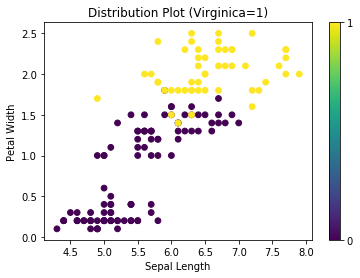

In [129]:
plt.scatter(np.array(df['SL']), np.array(df['PW']),c=df['IsVirginica'],s = weights*5000)
plt.colorbar(ticks = [0,1])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Distribution Plot (Virginica=1)')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
dt = tree.DecisionTreeClassifier

In [ ]:
dt = tree

In [ ]:
def adaboost(dataset, weights):
    dt = tree.DecisionTreeClassifier(max_depth=1,random_state=1)
    dt.fit(df[['SL','PW']],df["IsVirginica"],sample_weight=weights)
    tree.fit(dataset[['SL','PW']],sam)
    

In [137]:
tree.DecisionTreeClassifier(sample_w)